In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization, ZeroPadding2D, Add, ReLU, LSTM, Bidirectional, Input
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
data_frame = pd.read_excel('/content/data.xlsx')

In [3]:
data_frame.head(11)
df_preprocess = data_frame.dropna(subset='Unnamed: 0')

In [4]:
df_preprocess = df_preprocess.reset_index(drop=True)
df_preprocess.columns = df_preprocess.iloc[0]
df_preprocess = df_preprocess.drop(0).reset_index(drop=True)
df_preprocess

,STT,Thời điểm đo,NaN,NaN,Điện áp (V),NaN,NaN,Dòng điện (A),NaN,NaN,...,NaN,NaN,Tần số (Hz),NaN,NaN,NaN,I (đm),U (đm),P (đm),Mã trạm
0,1,01/01/22 00:00,01/01/2022 00:01:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,237.234,236.063,237.32,304.2,348.75,334.35,...,NaN,NaN,50.13,50.12,50.12,NaN,811.59,230,560,020343
1,2,01/01/2022 00:30:00,-,Serial: - - -\n- TU: - - TI: - - HSN: -,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-
2,3,01/01/22 01:00,01/01/2022 00:57:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,234.406,233.089,234.427,279.6,297.9,286.05,...,NaN,NaN,50.1,50.1,50.1,NaN,811.59,230,560,020343
3,4,01/01/22 01:30,01/01/2022 01:25:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,235.978,234.657,235.904,260.25,270.3,277.05,...,NaN,NaN,50.02,50.02,50.02,NaN,811.59,230,560,020343
4,5,01/01/22 02:00,01/01/2022 01:54:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,233.935,232.942,234.02,294,279.3,287.85,...,NaN,NaN,49.99,49.99,49.99,NaN,811.59,230,560,020343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26663,26664,20/06/23 13:00,20/06/2023 13:00:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,232.302,232.09,233.033,413.7,455.25,441.45,...,NaN,NaN,49.83,49.83,49.83,NaN,811.59,230,560,020343
26664,26665,20/06/23 13:30,20/06/2023 13:27:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,233.709,233.969,234.602,417,439.5,460.5,...,NaN,NaN,50.03,50.03,50.03,NaN,811.59,230,560,020343
26665,26666,20/06/23 14:00,20/06/2023 13:54:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,234.291,234.486,235.393,411.75,434.1,393.45,...,NaN,NaN,50.08,50.08,50.07,NaN,811.59,230,560,020343
26666,26667,20/06/23 14:30,20/06/2023 14:22:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,235.209,235.167,236.066,407.85,449.55,438.6,...,NaN,NaN,50.04,50.03,50.02,NaN,811.59,230,560,020343


In [5]:
df = df_preprocess.iloc[:, [1, 4]]
df

,Thời điểm đo,Điện áp (V)
0,01/01/22 00:00,237.234
1,01/01/2022 00:30:00,NaN
2,01/01/22 01:00,234.406
3,01/01/22 01:30,235.978
4,01/01/22 02:00,233.935
...,...,...
26663,20/06/23 13:00,232.302
26664,20/06/23 13:30,233.709
26665,20/06/23 14:00,234.291
26666,20/06/23 14:30,235.209


In [6]:
# df = df.dropna(subset='Điện áp (V)')
# df = df.reset_index(drop=True)
# df.shape

In [7]:
# df['Điện áp (V)'] = df['Điện áp (V)'].astype(float)

In [8]:
df['Thời điểm đo'] = pd.to_datetime(df['Thời điểm đo'], errors='coerce')
df['Year'] = df['Thời điểm đo'].dt.year
df['Month'] = df['Thời điểm đo'].dt.month
df['Day'] = df['Thời điểm đo'].dt.day
df['Hour'] = df['Thời điểm đo'].dt.hour
df['Minute'] = df['Thời điểm đo'].dt.minute

<ipython-input-8-9ec06a9c3de3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Thời điểm đo'] = pd.to_datetime(df['Thời điểm đo'], errors='coerce')
<ipython-input-8-9ec06a9c3de3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Thời điểm đo'] = pd.to_datetime(df['Thời điểm đo'], errors='coerce')
<ipython-input-8-9ec06a9c3de3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [9]:
# Check for null values in the 'Year' column
null_years = df['Điện áp (V)'].isnull().sum()
print(f'Number of null values in the Year column: {null_years}')
df = df.dropna(subset='Điện áp (V)')
df = df.reset_index(drop=True)

Number of null values in the Year column: 1391


In [10]:
df['DayOfWeek'] = df['Thời điểm đo'].dt.dayofweek
df['DayOfYear'] = df['Thời điểm đo'].dt.dayofyear
df['Quarter'] = df['Thời điểm đo'].dt.quarter
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


In [11]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

In [12]:
df['TimeDifference'] = df['Thời điểm đo'] - df['Thời điểm đo'].shift(1)

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
season_encoded = encoder.fit_transform(df[['Season']]).toarray()

In [14]:
# Map the season names to numerical values
season_mapping = {'Winter': 0.0, 'Spring': 1.0, 'Summer': 2.0, 'Fall': 3.0}
df['Season'] = df['Season'].map(season_mapping).astype(float)

In [15]:
# from sklearn.impute import KNNImputer

# # Select the columns to impute
# columns_to_impute = ['Điện áp (V)', 'Year', 'Month', 'Day', 'Hour', 'Minute',
#        'DayOfWeek', 'DayOfYear', 'Quarter', 'IsWeekend', 'Season', 'Hour_sin',
#        'Hour_cos', 'Month_sin', 'Month_cos', 'TimeDifference']

# # Initialize the KNNImputer
# imputer = KNNImputer(n_neighbors=5)

# # Apply the imputer to the selected columns
# df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# # Verify the imputation
# df.info()

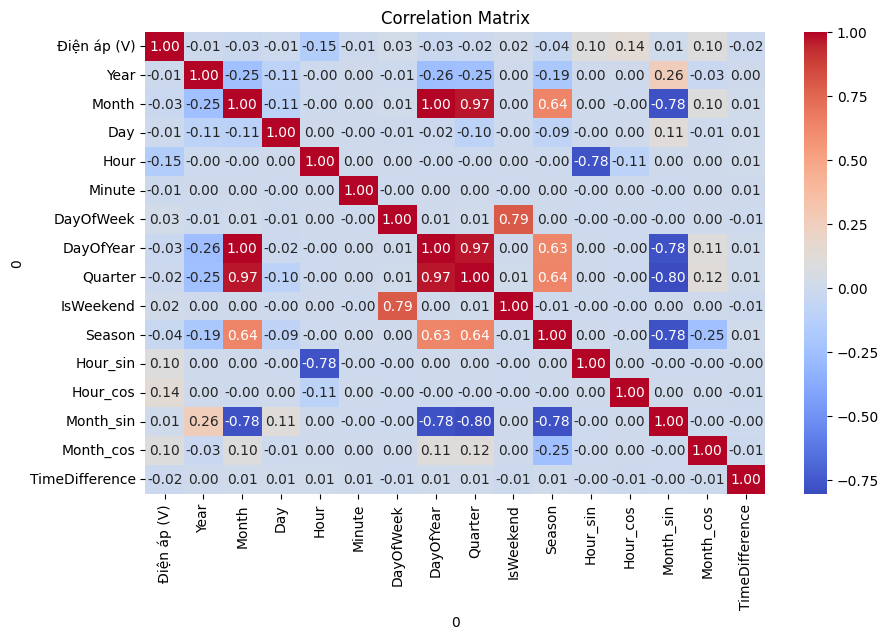

In [16]:
import seaborn as sns

# Select the relevant columns
cols = ['Điện áp (V)', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'DayOfWeek', 'DayOfYear', 'Quarter', 'IsWeekend', 'Season', 'Hour_sin',
       'Hour_cos', 'Month_sin', 'Month_cos', 'TimeDifference']
corr_matrix = df[cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [17]:
df = df.dropna(subset='TimeDifference')
df = df.reset_index(drop=True)
df

,Thời điểm đo,Điện áp (V),Year,Month,Day,Hour,Minute,DayOfWeek,DayOfYear,Quarter,IsWeekend,Season,Hour_sin,Hour_cos,Month_sin,Month_cos,TimeDifference
0,2022-01-01 01:00:00,234.406,2022,1,1,1,0,5,1,1,1,0.0,2.588190e-01,0.965926,5.000000e-01,0.866025,0 days 01:00:00
1,2022-01-01 01:30:00,235.978,2022,1,1,1,30,5,1,1,1,0.0,2.588190e-01,0.965926,5.000000e-01,0.866025,0 days 00:30:00
2,2022-01-01 02:00:00,233.935,2022,1,1,2,0,5,1,1,1,0.0,5.000000e-01,0.866025,5.000000e-01,0.866025,0 days 00:30:00
3,2022-01-01 02:30:00,235.131,2022,1,1,2,30,5,1,1,1,0.0,5.000000e-01,0.866025,5.000000e-01,0.866025,0 days 00:30:00
4,2022-01-01 03:00:00,235.016,2022,1,1,3,0,5,1,1,1,0.0,7.071068e-01,0.707107,5.000000e-01,0.866025,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25271,2023-06-20 12:30:00,230.992,2023,6,20,12,30,1,171,2,0,2.0,1.224647e-16,-1.000000,1.224647e-16,-1.000000,0 days 00:30:00
25272,2023-06-20 13:00:00,232.302,2023,6,20,13,0,1,171,2,0,2.0,-2.588190e-01,-0.965926,1.224647e-16,-1.000000,0 days 00:30:00
25273,2023-06-20 13:30:00,233.709,2023,6,20,13,30,1,171,2,0,2.0,-2.588190e-01,-0.965926,1.224647e-16,-1.000000,0 days 00:30:00
25274,2023-06-20 14:00:00,234.291,2023,6,20,14,0,1,171,2,0,2.0,-5.000000e-01,-0.866025,1.224647e-16,-1.000000,0 days 00:30:00


In [18]:

df['TimeDifference_hours'] = df['TimeDifference'].dt.components['hours']
df['TimeDifference_minutes'] = df['TimeDifference'].dt.components['minutes']

df['TimeDifference_hours_sin']= np.sin(2 * np.pi * df['TimeDifference_hours'] / 24)
df['TimeDifference_hours_cos']= np.cos(2 * np.pi * df['TimeDifference_hours'] / 24)
df.head()

,Thời điểm đo,Điện áp (V),Year,Month,Day,Hour,Minute,DayOfWeek,DayOfYear,Quarter,...,Season,Hour_sin,Hour_cos,Month_sin,Month_cos,TimeDifference,TimeDifference_hours,TimeDifference_minutes,TimeDifference_hours_sin,TimeDifference_hours_cos
0,2022-01-01 01:00:00,234.406,2022,1,1,1,0,5,1,1,...,0.0,0.258819,0.965926,0.5,0.866025,0 days 01:00:00,1,0,0.258819,0.965926
1,2022-01-01 01:30:00,235.978,2022,1,1,1,30,5,1,1,...,0.0,0.258819,0.965926,0.5,0.866025,0 days 00:30:00,0,30,0.000000,1.000000
2,2022-01-01 02:00:00,233.935,2022,1,1,2,0,5,1,1,...,0.0,0.500000,0.866025,0.5,0.866025,0 days 00:30:00,0,30,0.000000,1.000000
3,2022-01-01 02:30:00,235.131,2022,1,1,2,30,5,1,1,...,0.0,0.500000,0.866025,0.5,0.866025,0 days 00:30:00,0,30,0.000000,1.000000
4,2022-01-01 03:00:00,235.016,2022,1,1,3,0,5,1,1,...,0.0,0.707107,0.707107,0.5,0.866025,0 days 00:30:00,0,30,0.000000,1.000000


In [19]:
df.columns

Index(['Thời điểm đo', 'Điện áp (V)', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'DayOfWeek', 'DayOfYear', 'Quarter', 'IsWeekend', 'Season', 'Hour_sin',
       'Hour_cos', 'Month_sin', 'Month_cos', 'TimeDifference',
       'TimeDifference_hours', 'TimeDifference_minutes',
       'TimeDifference_hours_sin', 'TimeDifference_hours_cos'],
      dtype='object', name=0)

In [20]:
columns_to_convert = ['Điện áp (V)', 'Year', 'Month', 'Day', 'Hour', 'Minute',
    'DayOfWeek', 'DayOfYear', 'Quarter', 'IsWeekend', 'Season',
    'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos','TimeDifference_hours',
    'TimeDifference_minutes','TimeDifference_hours_sin', 'TimeDifference_hours_cos']
df_preprocess = df[columns_to_convert].astype(float)
df_preprocess.dtypes

,0
0,
Điện áp (V),float64
Year,float64
Month,float64
Day,float64
Hour,float64
Minute,float64
DayOfWeek,float64
DayOfYear,float64
Quarter,float64


In [21]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
columns_to_normalize = [ 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'DayOfWeek', 'DayOfYear', 'Quarter', 'IsWeekend', 'Season', 'Hour_sin',
       'Hour_cos', 'Month_sin', 'Month_cos', 'TimeDifference_hours',
       'TimeDifference_minutes', 'TimeDifference_hours_sin', 'TimeDifference_hours_cos']

df_preprocess['Điện áp (V)'] = minmax_scaler.fit_transform(df_preprocess[['Điện áp (V)']])
df_preprocess['Điện áp (V)'] = standard_scaler.fit_transform(df_preprocess[['Điện áp (V)']])
df_preprocess[columns_to_normalize] = minmax_scaler.fit_transform(df_preprocess[columns_to_normalize])
df_preprocess[columns_to_normalize] = standard_scaler.fit_transform(df_preprocess[columns_to_normalize])


In [23]:
from sklearn.cluster import KMeans

kmeans_YMD = KMeans(n_clusters=10, random_state=42)
kmeans_YMD.fit(df_preprocess[['Year', 'Month', 'Day']])

df_preprocess['KMean_Cluster_YMD'] = kmeans_YMD.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
kmeans_HM = KMeans(n_clusters=10, random_state=42)
kmeans_HM.fit(df_preprocess[['Hour', 'Minute']])

df_preprocess['KMean_Cluster_HM'] = kmeans_HM.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
kmeans_DoWY = KMeans(n_clusters=10, random_state=42)
kmeans_DoWY.fit(df_preprocess[['DayOfWeek', 'DayOfYear']])

df_preprocess['KMean_Cluster_DoWY'] = kmeans_DoWY.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
kmeans_sincos = KMeans(n_clusters=10, random_state=42)
kmeans_sincos.fit(df_preprocess[['Hour_sin','Hour_cos', 'Month_sin', 'Month_cos','TimeDifference_hours_sin', 'TimeDifference_hours_cos']])

df_preprocess['KMean_Cluster_sincos'] = kmeans_sincos.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df_preprocess)

df_preprocess['KMean_Cluster'] = kmeans_sincos.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=5).fit(df_preprocess[columns_to_normalize])
df_preprocess['DBSCAN_Cluster'] = dbscan.labels_

In [ ]:
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# import numpy as np

# Z = linkage(df_preprocess[columns_to_normalize], method='ward')

# num_clusters = 30
# cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
# df_preprocess['fcluster'] = cluster_labels

In [33]:
from sklearn.impute import KNNImputer

# Select the columns to impute
columns_to_impute = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek',
       'DayOfYear', 'Quarter', 'IsWeekend', 'Season', 'Hour_sin', 'Hour_cos',
       'Month_sin', 'Month_cos', 'TimeDifference_hours',
       'TimeDifference_minutes', 'TimeDifference_hours_sin', 'TimeDifference_hours_cos',
                    'KMean_Cluster_YMD', 'KMean_Cluster_DoWY', 'KMean_Cluster_sincos', 'DBSCAN_Cluster','KMean_Cluster']

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=10)

# Apply the imputer to the selected columns
df_preprocess[columns_to_impute] = imputer.fit_transform(df_preprocess[columns_to_impute])


In [34]:
X = df_preprocess[columns_to_impute]
Y = df_preprocess['Điện áp (V)']
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model = rf_model.fit(X_train, Y_train)

# Predict on the test set
y_test_pred = rf_model.predict(X_temp)

# Calculate the R² score for the test set
r2_test = r2_score(Y_temp, y_test_pred)
print(f'R² Score on Test Set: {r2_test}')

R² Score on Test Set: 0.7421337286181573


In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,  AdaBoostRegressor
# Initialize KFold with the desired number of splits
kf = KFold(n_splits=20, shuffle=True, random_state=42)

# Lists to store the results
r2_scores = []
mse_scores = []
model = {'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)}

# Iterate over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train the model
    model1 = model['RandomForest'].fit(X_train, Y_train)

    # Make predictions on the test set
    Y_pred = model['RandomForest'].predict(X_test)

    # Calculate the R² score
    r2 = r2_score(Y_test, Y_pred)
    r2_scores.append(r2)

    # Calculate the MSE
    mse = mean_squared_error(Y_test, Y_pred)
    mse_scores.append(mse)

# Calculate the mean R² score
r2_mean = np.mean(r2_scores)
print(f'Mean R² Score: {r2_mean}')
# Calculate the mean MSE
mse_mean = np.mean(mse_scores)
print(f'Mean MSE: {mse_mean}')


Mean R² Score: 0.29719267369834174
Mean MSE: 0.7021584629251821


In [39]:
r2_scores

[0.2810877650161089,
 0.3170937959272204,
 0.2685552140798303,
 0.2463017913751553,
 0.36031488630992037,
 0.3304587049439739,
 0.2837564224980996,
 0.2591297438357322,
 0.28713556226369674,
 0.28296319118078717,
 0.32556078016586354,
 0.2977498603182406,
 0.26362974138339135,
 0.26146626497219383,
 0.2578336740698858,
 0.2962677685692785,
 0.3559125208452959,
 0.3623135282167502,
 0.31654425826317834,
 0.2897779997322325]